Data reloaded for SHAP.


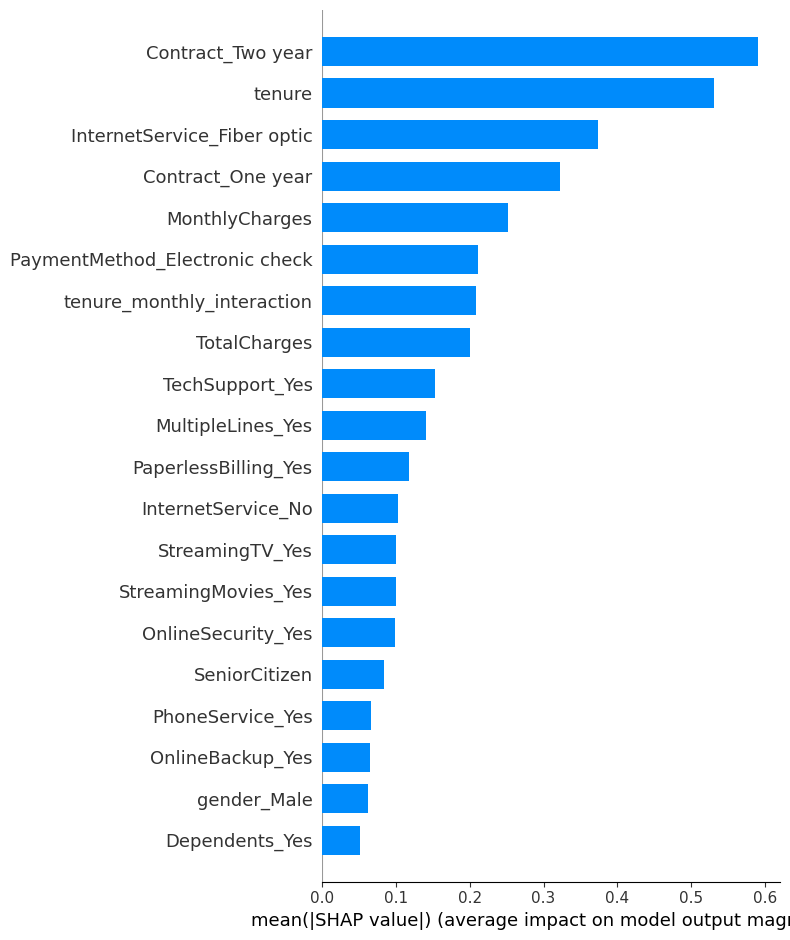

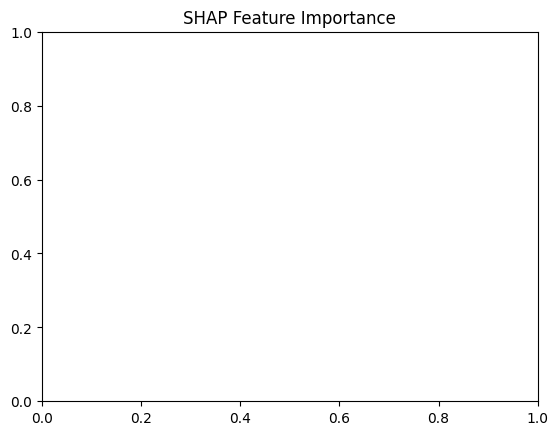

SHAP done — see top factors like tenure, Contract.


In [4]:

# 1. Imports
import pandas as pd
import shap
import joblib
import streamlit as st 
import matplotlib.pyplot as plt 

# 2. Load saved model and data
best_model = joblib.load('../app/best_model.pkl')

df = pd.read_csv('../data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna(subset=['TotalCharges']).reset_index(drop=True)
df = df.drop('customerID', axis=1)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])

X = pd.get_dummies(df.drop('Churn', axis=1), drop_first=True)
#added from chatgbt----
X = X.reindex(columns=best_model.feature_names_in_, fill_value=0)
#----------------------
y = df['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Data reloaded for SHAP.")

# 3. SHAP Explanations
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar")
plt.title('SHAP Feature Importance')
plt.show()

shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

print("SHAP done — see top factors like tenure, Contract.")